<a href="https://colab.research.google.com/github/AlekhyaPasupuleti/cmpe-258-fire-detection-using-deep-learning/blob/main/Fire_Detection_CNN_and_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Train a MobileNet model on custom dataset from scratch to detect fire 

# Mount dataset from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Fire Detection Dataset/Image")
!pwd

/content/drive/.shortcut-targets-by-id/1KT0y0btTygfYsiV-7sEn3M7wMOGPiq6_/Data255 Project Fire Detection/Image


In [ ]:
ls

 Fire/
'Multiclass ROC curve for Baseline MobilenetV2 Model on the Fire Detection Dataset.png'
 Not_Fire/


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pylab as plt
import numpy as np
import os
import numpy as np
import shutil
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from keras.optimizers import Adam
import keras.backend as K
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

### Image preparation

In [ ]:
train_path = '/content/drive/MyDrive/Fire Detection Dataset/Split_Image/train'
valid_path = '/content/drive/MyDrive/Fire Detection Dataset/Split_Image/valid'
test_path = '/content/drive/MyDrive/Fire Detection Dataset/Split_Image/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=1024)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=256)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=256, shuffle=False)

Found 27196 images belonging to 2 classes.
Found 5828 images belonging to 2 classes.
Found 5828 images belonging to 2 classes.


### Modify Model

In [ ]:

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(32,3,padding="same", activation="relu"))

model.add(MaxPool2D())


model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
# model.add(Dropout(0.3))

model.add(Conv2D(256, 3, padding="same", activation="relu"))
model.add(Conv2D(236, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
# model.add(Dropout(0.3))

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
# model.add(Dense(1, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_20 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

In [ ]:
model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_batches, epochs=5, validation_data=valid_batches)

Epoch 1/5
27/27 [==============================] - 107s 4s/step - loss: 0.6835 - accuracy: 0.7057 - val_loss: 0.5277 - val_accuracy: 0.7068
Epoch 2/5
27/27 [==============================] - 95s 3s/step - loss: 0.4496 - accuracy: 0.7255 - val_loss: 0.3565 - val_accuracy: 0.8392
Epoch 3/5
27/27 [==============================] - 95s 3s/step - loss: 0.2941 - accuracy: 0.8767 - val_loss: 0.2291 - val_accuracy: 0.9087
Epoch 4/5
27/27 [==============================] - 95s 3s/step - loss: 0.2102 - accuracy: 0.9155 - val_loss: 0.1567 - val_accuracy: 0.9434
Epoch 5/5
27/27 [==============================] - 94s 3s/step - loss: 0.1274 - accuracy: 0.9543 - val_loss: 0.0914 - val_accuracy: 0.9698


### Test the model and plot confusion matrix

In [ ]:
test_score=model.evaluate(test_batches)

23/23 [==============================] - 325s 15s/step - loss: 0.1111 - accuracy: 0.9626


In [ ]:
test_labels = test_batches.classes

Predictions

In [ ]:
predictions = model.predict_generator(test_batches, steps=47, verbose=1)

<ipython-input-36-71fe49d3123b>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_batches, steps=47, verbose=1)


23/47 [=============>................] - ETA: 16s

47/47 [==============================] - 16s 336ms/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Plotting the confusion matrix for CNN to understand the true positives and true negetives 

Confusion matrix, without normalization
[[3981  138]
 [  80 1629]]


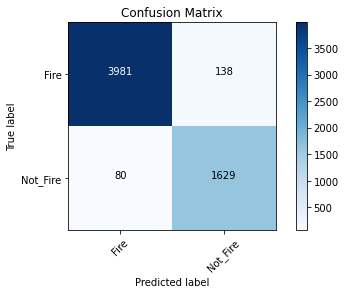

In [ ]:
cm_plot_labels = ['Fire','Not_Fire']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

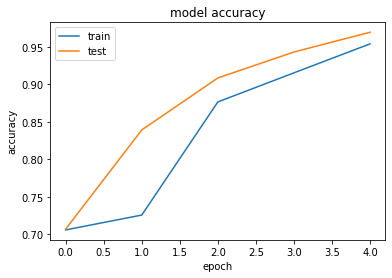

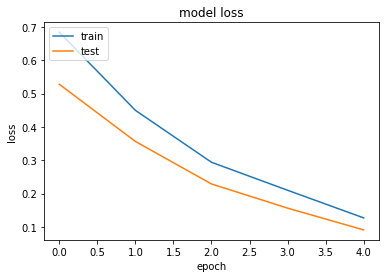

In [ ]:
# summarize history for accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Save the model as .h5 file and plot the accuarcy and loss 

<Figure size 432x288 with 0 Axes>

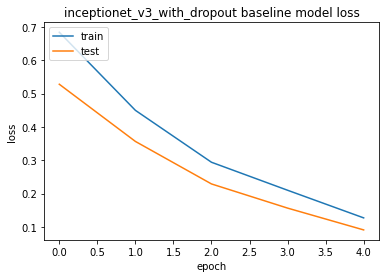

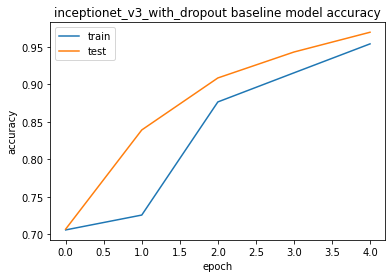

<Figure size 432x288 with 0 Axes>

In [ ]:
model.save_weights("DCNN_1.h5")
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('CNN baseline model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.figure()

plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('CNN baseline model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.figure()

Results : We ran the CNN model for 5 epochs due to time consumption and resource usage. The final results after 5 epochs are- loss: 0.1274 - accuracy: 0.9543 - val_loss: 0.0914 - val_accuracy: 0.9698.  The model consumed around 49 units of GPU to run 5 epochs with runtime being 1 hr 50 mins. 

## **ResNet50**

Importing the model and the pre trained weights of imagenet to be used for our classification

In [ ]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:

resnet_model = ResNet50(include_top=False, weights='imagenet', pooling='max', input_shape=(224,224,3))
resnet_model.trainable = False

Displaying the summary of the Resnet50 model 

In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Using "softmax" activation function with dropout = 0.3 

In [ ]:
base_model = Sequential([
    resnet_model,
    Dropout(0.3),
    Dense(2, activation='softmax')
])

using Adam optimzer and loss = categorical_crossentropy

In [ ]:
base_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Running thr model for epochs = 5

In [ ]:
resnet_history = base_model.fit(train_batches, validation_data = valid_batches, epochs = 5)

Epoch 1/5
27/27 [==============================] - 100s 4s/step - loss: 1.4179 - accuracy: 0.6059 - val_loss: 0.7376 - val_accuracy: 0.7239
Epoch 2/5
27/27 [==============================] - 93s 3s/step - loss: 0.9793 - accuracy: 0.6474 - val_loss: 0.6061 - val_accuracy: 0.7497
Epoch 3/5
27/27 [==============================] - 93s 3s/step - loss: 0.8188 - accuracy: 0.6746 - val_loss: 0.5206 - val_accuracy: 0.7629
Epoch 4/5
27/27 [==============================] - 93s 3s/step - loss: 0.6856 - accuracy: 0.7080 - val_loss: 0.4589 - val_accuracy: 0.7836
Epoch 5/5
27/27 [==============================] - 93s 4s/step - loss: 0.5925 - accuracy: 0.7315 - val_loss: 0.4409 - val_accuracy: 0.7886


Displaing the loss and accuarcy graph of Resnet50

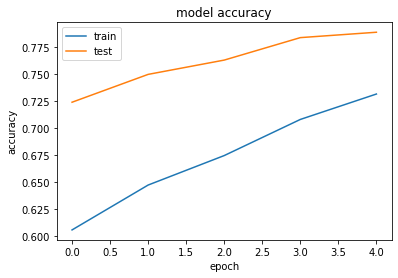

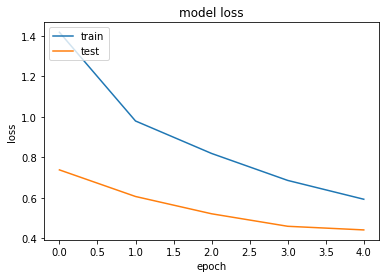

In [ ]:
# summarize history for accuracy
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Figure size 432x288 with 0 Axes>

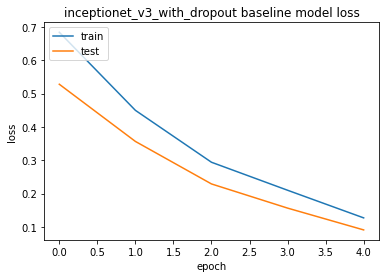

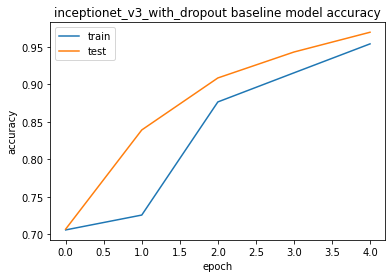

<Figure size 432x288 with 0 Axes>

In [ ]:
base_model.save_weights("Rexnet50_1.h5")
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Resnet50 baseline model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.figure()

plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Resnet50 baseline model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.figure()

Evaluating the model on validation data

In [ ]:
val_acc1 = base_model.evaluate(valid_batches)[1]
print("validation_accuracy: " + str(val_acc1))

# test_score=model.evaluate(test_batches)

test_labels = valid_batches.classes
predictions = base_model.predict_generator(valid_batches, steps=47, verbose=1)



23/23 [==============================] - 17s 716ms/step - loss: 0.4409 - accuracy: 0.7886
validation_accuracy: 0.7886067032814026


<ipython-input-69-9c2494853bf4>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = base_model.predict_generator(valid_batches, steps=47, verbose=1)


23/47 [=============>................] - ETA: 17s

47/47 [==============================] - 18s 345ms/step
Performance of Baseline inceptionet_v3_with_dropout Model on the Fire Detection Dataset:

[[3659  460]
 [1488  221]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      4119
           1       0.32      0.13      0.18      1709

    accuracy                           0.67      5828
   macro avg       0.52      0.51      0.49      5828
weighted avg       0.60      0.67      0.61      5828



NameError: ignored

Displaying the confusion matrix,precision , recall and f1-score for Resnet50

In [ ]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

print('Performance of Baseline inceptionet_v3_with_dropout Model on the Fire Detection Dataset:\n')
print(confusion_matrix(test_labels, predictions.argmax(axis=1)))
print(classification_report(test_labels, predictions.argmax(axis=1)))
print('Accuracy:',accuracy(test_labels, predictions.argmax(axis=1)))
print('Precision:',precision_score(test_labels, predictions.argmax(axis=1), average='weighted'))
print('Recall:',recall_score(test_labels, predictions.argmax(axis=1), average='weighted'))
print('F1 Score:',f1_score(test_labels, predictions.argmax(axis=1), average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(test_labels, predictions.argmax(axis=1)))

cm_plot_labels = ['Fire','Not_Fire']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

fpr, tpr, thresholds = roc_curve(test_labels, predictions.argmax(axis=1), pos_label = 1)
# AUC score that summarizes the ROC curve

Performance of Baseline inceptionet_v3_with_dropout Model on the Fire Detection Dataset:

[[3659  460]
 [1488  221]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      4119
           1       0.32      0.13      0.18      1709

    accuracy                           0.67      5828
   macro avg       0.52      0.51      0.49      5828
weighted avg       0.60      0.67      0.61      5828



NameError: ignored

Results : We ran the base_model for 5 epochs due to time consumption and resource usage. The final results after 5 epochs are-  loss: 0.5925 - accuracy: 0.7315 - val_loss: 0.4409 - val_accuracy: 0.788.  The model consumed around 38 units of GPU to run 5 epochs with runtime being 1hr 28 mins.